In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
#Все Функции
#Функция,при помощи которой можно получить информацию о каждом столбце
def get_unique_and_isnull(df):
    for col in list(df.columns):
        print(col)
        print(df[col].unique())
        print(df[col].value_counts())
        print('Пустых значений:')
        print(df[col].isnull().sum())
        print('Уникальных значений:')
        print(df[col].nunique())
        print()
        
#Функция построения графиков boxplot по списку

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:5])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
# Функция нахождения значимых параметров с использованием теста Стьюдента

def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдено статическо значимое различие для колонн', column)
            break

In [6]:
students = pd.read_csv('stud_math.csv')
students.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     NaN       A   4.0   4.0   at_home   teacher   
1       GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
2       GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3       GP   F   15       U     GT3       T   4.0   2.0    health       NaN   
4       GP   F   16       U     GT3       T   3.0   3.0     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
391     MS   M   17       U     LE3       T   3.0   1.0  services  services   
392     MS   M   21       R     GT3       T   1.0   1.0     other     other   
393     MS   M   18       R     LE3       T   3.0   2.0  services     other   
394     MS   M   19       U     LE3       T   1.0   1.0     other   at_home   

     reason guardia

In [8]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [9]:
students.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu',
                'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob'}, inplace=True)

In [10]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [11]:
students.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
pstatus                 object
medu                   float64
fedu                   float64
mjob                    object
fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [12]:
students.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [13]:
students = students.loc[students.score.isnull() != True]
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [14]:
get_unique_and_isnull(students)

school
['GP' 'MS']
GP    344
MS     45
Name: school, dtype: int64
Пустых значений:
0
Уникальных значений:
2

sex
['F' 'M']
F    204
M    185
Name: sex, dtype: int64
Пустых значений:
0
Уникальных значений:
2

age
[18 17 15 16 19 22 20 21]
16    103
17     98
15     82
18     80
19     21
20      3
21      1
22      1
Name: age, dtype: int64
Пустых значений:
0
Уникальных значений:
8

address
['U' nan 'R']
U    291
R     83
Name: address, dtype: int64
Пустых значений:
15
Уникальных значений:
2

famsize
[nan 'GT3' 'LE3']
GT3    255
LE3    107
Name: famsize, dtype: int64
Пустых значений:
27
Уникальных значений:
2

pstatus
['A' nan 'T']
T    308
A     36
Name: pstatus, dtype: int64
Пустых значений:
45
Уникальных значений:
2

medu
[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: medu, dtype: int64
Пустых значений:
3
Уникальных значений:
5

fedu
[ 4.  1.  2.  3. 40. nan  0.]
2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: fedu

In [15]:
students = students.loc[students.age < 20]
students = students.loc[students.medu != 0.0]
students.loc[(students.fedu == 40.0), 'fedu'] = 4.0
students = students.loc[students.fedu != 0.0]
students = students.loc[students.traveltime != 4.0]
students.loc[(students.famrel == -1.0), 'famrel'] = 1.0
students = students.loc[students.famrel != 1.0]
students = students.loc[(students.absences == 0.0) | (students.absences == 2.0) | (students.absences == 4.0) |
                        (students.absences == 6.0) | (students.absences == 8.0) | (students.absences == 10.0) |
                        (students.absences == 12.0) | (students.absences == 14.0)]
students = students.loc[(students.score == 50.0) | (students.score == 55.0) | (students.score == 0.0) |
                        (students.score == 75.0) | (students.score == 65.0) | (students.score == 60.0) |
                        (students.score == 40.0) | (students.score == 45.0) | (students.score == 70.0) |
                        (students.score == 80.0) | (students.score == 30.0) | (students.score == 90.0)]

In [16]:
get_unique_and_isnull(students)

school
['GP' 'MS']
GP    248
MS     29
Name: school, dtype: int64
Пустых значений:
0
Уникальных значений:
2

sex
['F' 'M']
F    150
M    127
Name: sex, dtype: int64
Пустых значений:
0
Уникальных значений:
2

age
[18 17 15 16 19]
16    80
15    68
17    67
18    49
19    13
Name: age, dtype: int64
Пустых значений:
0
Уникальных значений:
5

address
['U' nan 'R']
U    211
R     53
Name: address, dtype: int64
Пустых значений:
13
Уникальных значений:
2

famsize
[nan 'GT3' 'LE3']
GT3    184
LE3     75
Name: famsize, dtype: int64
Пустых значений:
18
Уникальных значений:
2

pstatus
['A' nan 'T']
T    225
A     22
Name: pstatus, dtype: int64
Пустых значений:
30
Уникальных значений:
2

medu
[ 4.  1.  3.  2. nan]
4.0    93
2.0    79
3.0    63
1.0    39
Name: medu, dtype: int64
Пустых значений:
3
Уникальных значений:
4

fedu
[ 4.  1.  2.  3. nan]
2.0    78
3.0    73
4.0    58
1.0    51
Name: fedu, dtype: int64
Пустых значений:
17
Уникальных значений:
4

mjob
['at_home' 'health' 'other' 'services' 

In [ ]:
students = students.loc[(students.absences != 14.0)

In [18]:

get_unique_and_isnull(students)

school
['GP' 'MS']
GP    248
MS     29
Name: school, dtype: int64
Пустых значений:
0
Уникальных значений:
2

sex
['F' 'M']
F    150
M    127
Name: sex, dtype: int64
Пустых значений:
0
Уникальных значений:
2

age
[18 17 15 16 19]
16    80
15    68
17    67
18    49
19    13
Name: age, dtype: int64
Пустых значений:
0
Уникальных значений:
5

address
['U' nan 'R']
U    211
R     53
Name: address, dtype: int64
Пустых значений:
13
Уникальных значений:
2

famsize
[nan 'GT3' 'LE3']
GT3    184
LE3     75
Name: famsize, dtype: int64
Пустых значений:
18
Уникальных значений:
2

pstatus
['A' nan 'T']
T    225
A     22
Name: pstatus, dtype: int64
Пустых значений:
30
Уникальных значений:
2

medu
[ 4.  1.  3.  2. nan]
4.0    93
2.0    79
3.0    63
1.0    39
Name: medu, dtype: int64
Пустых значений:
3
Уникальных значений:
4

fedu
[ 4.  1.  2.  3. nan]
2.0    78
3.0    73
4.0    58
1.0    51
Name: fedu, dtype: int64
Пустых значений:
17
Уникальных значений:
4

mjob
['at_home' 'health' 'other' 'services' 

In [19]:
students.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161823,-0.139769,0.137690,0.026780,0.123403,-0.026780,-0.044151,0.004614,0.174755,-0.058892,0.088538,-0.219530
medu,-0.161823,1.000000,0.635194,-0.141416,0.049043,-0.251784,-0.049043,0.003336,0.018416,0.041010,-0.015614,0.036577,0.211856
fedu,-0.139769,0.635194,1.000000,-0.049820,-0.031459,-0.246263,0.031459,0.006315,0.011554,0.013274,-0.008938,-0.073443,0.089054
traveltime,0.137690,-0.141416,-0.049820,1.000000,-0.144090,0.043500,0.144090,-0.053636,-0.042171,-0.037340,0.003204,0.000696,-0.084327
studytime,0.026780,0.049043,-0.031459,-0.144090,1.000000,-0.154517,-1.000000,0.057708,-0.085894,-0.007885,-0.029948,0.027372,0.073156
failures,0.123403,-0.251784,-0.246263,0.043500,-0.154517,1.000000,0.154517,-0.024887,0.035326,-0.007217,0.096476,0.027276,-0.332396
"studytime, granular",-0.026780,-0.049043,0.031459,0.144090,-1.000000,0.154517,1.000000,-0.057708,0.085894,0.007885,0.029948,-0.027372,-0.073156
famrel,-0.044151,0.003336,0.006315,-0.053636,0.057708,-0.024887,-0.057708,1.000000,0.151730,0.039093,0.090164,-0.055820,0.071973
freetime,0.004614,0.018416,0.011554,-0.042171,-0.085894,0.035326,0.085894,0.151730,1.000000,0.259252,0.073915,-0.008840,0.013044
goout,0.174755,0.041010,0.013274,-0.037340,-0.007885,-0.007217,0.007885,0.039093,0.259252,1.000000,0.005406,0.104799,-0.112318


<AxesSubplot:>

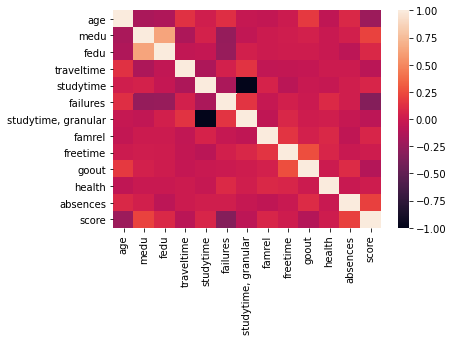

In [20]:
sns.heatmap(students.corr())

In [ ]:
students.drop('studytime, granular', axis = 1, inplace = True)
students

In [25]:
students_for_model = students.loc[:, ['age', 'medu', 'failures', 'absences','paid', 'higher', 'romantic']]
students_for_model.head()

,age,medu,failures,absences,paid,higher,romantic
0,18,4.0,0.0,6.0,no,yes,no
1,17,1.0,0.0,4.0,no,yes,no
2,15,1.0,3.0,10.0,NaN,yes,NaN
3,15,4.0,0.0,2.0,yes,yes,yes
4,16,3.0,0.0,4.0,yes,yes,no
